## What is Fastfuels?

It's a dataset describing 3D fuelscapes for the contiguous US and the fuel input for the QuicFire model

<div>
<img src="imgs/fastfuels.png" width="500" /> <img src="imgs/fastfuels-quicfire.png" width="500"/>
</div>
(left) - FastFuels Example Data; (right) - FastFuels-QuicFire model output

**references:** 
- https://burnpro3d.sdsc.edu/
- https://wifire-data.sdsc.edu/
- https://www.firelab.org/project/fastfuels-3d-fuels-next-generation-fire-models
- FastFuels Example Data demo: https://www.firelab.org/media/911
- FastFuels-QuicFire demo: https://www.firelab.org/media/912

## Accessing FastFuels dataset

reference:  https://pypi.org/project/fastfuels/

### Installation
install FastFuels and other dependencies 

In [1]:
# install dependencies
!pip3 install fastfuels==0.5.3  s3fs==0.5.2 fsspec==0.8.3 

In [2]:
import fastfuels
import matplotlib.pyplot as plt

### Connecting to a .fio resource

A .fio resource is a directory-in-file object where important metadata and fuel arrays are stored. You can open a .fio resource  stored remotely if you have the appropriate credentials.

In [3]:
fio = fastfuels.open('https://wifire-data.sdsc.edu:9000/fastfuels/index.fio', ftype='s3', username='fastfuels', password='Treatment##Buffet')
fio.cache_limit = 1e14

### Let's choose a location to explore the dataset such as the Dixie Fire in Lassen National Forest 
https://www.fire.ca.gov/incidents/2021/7/13/dixie-fire/

In [4]:
# Dixie Fire location in Lassen National Forest (https://www.fire.ca.gov/incidents/2021/7/13/dixie-fire/) 
lat = 44.040418
lon = -120.365702

# this command will return a square kilometer of fuels (radius=500 meters)
roi = fio.query(lon, lat, 250)

Bounding box query found in single source: or_set/or_72.fio


### Explore the metadata

Let's take a look at some metadata. You can get the extent of the data in geographic coordinates (longitude and latitude) or in projected coordinates by changing the mode argument.

In [5]:
print(fio.get_extent(mode='geographic'))

(-118.98982151954638, 23.65339284067175, -74.06057140329031, 49.399686289680474)


In [6]:
print(fio.get_extent(mode='projected'))

(-2361555.0, 358137, 1600988, 3117712)


And the projection system is stored in the proj attribute.

In [7]:
print(fio.proj)

PROJCS["Albers_Conic_Equal_Area",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


You can also view metadata for resolution and units

In [8]:
print(fio.res)

[1, 1, 1]


In [9]:
print(fio.units)

meters


### Viewing fuels in 3D

Fuel parameter arrays can be viewed interactively in 3D. To see the available parameters run

In [10]:
print(roi.get_properties())

['bulk_density', 'sav', 'moisture', 'fuel_depth', 'elevation']


C:\Users\krish\anaconda3\lib\site-packages\pyvista\core\dataset.py:1332: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  warnings.warn(
C:\Users\krish\anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


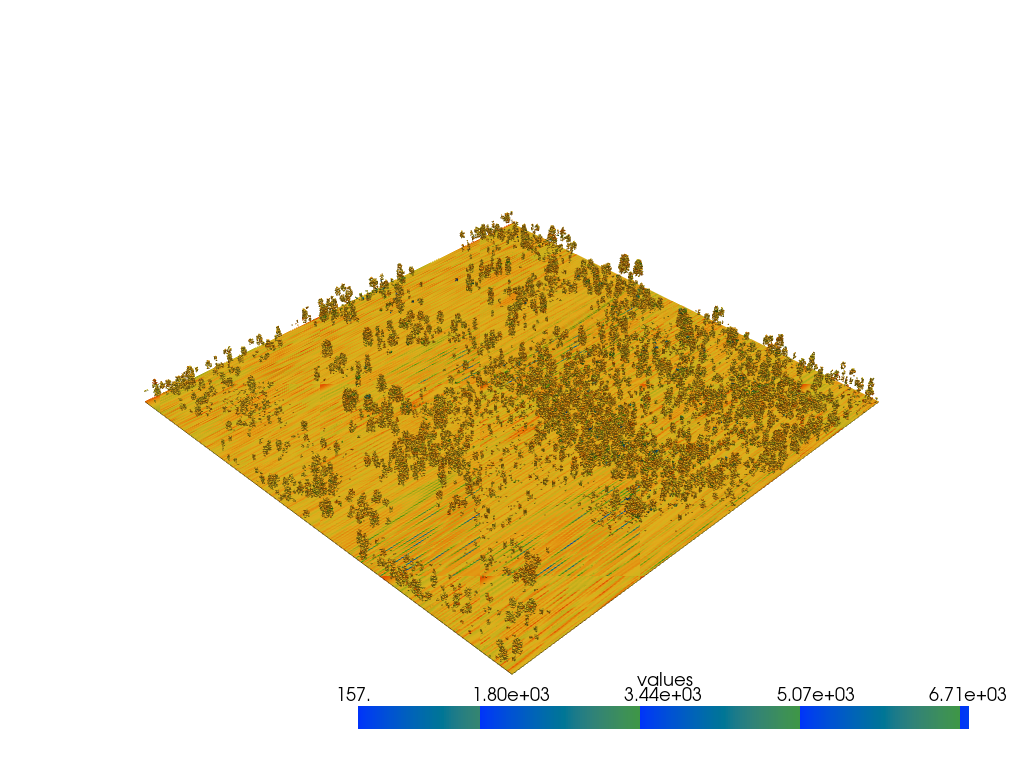

In [11]:
# sav = surface-area-to-volume
roi.view('sav')

### let's look at the voxel data (each voxel is 1 m^3)

In [12]:
raw_sav_data = roi.data_dict['sav']

In [13]:
raw_sav_data.shape

(500, 500, 128)

In [14]:
raw_sav_data[:,:,0]

array([[5301.961 , 5333.3335, 5333.3335, ..., 5145.098 , 5176.4707,
        5207.8433],
       [5521.569 , 5521.569 , 5521.569 , ..., 5176.4707, 5207.8433,
        5239.216 ],
       [5709.804 , 5709.804 , 5709.804 , ..., 5207.8433, 5239.216 ,
        5270.5884],
       ...,
       [4109.804 , 4078.4316, 4078.4316, ..., 4831.3726, 4831.3726,
        4862.745 ],
       [4109.804 , 4078.4316, 4078.4316, ..., 4831.3726, 4831.3726,
        4831.3726],
       [4109.804 , 4078.4316, 4047.059 , ..., 4831.3726, 4831.3726,
        4831.3726]], dtype=float32)

### let's visualize this data

Text(0.5, 1.0, 'Surface-area-to-volume(sav) for central Oregon')

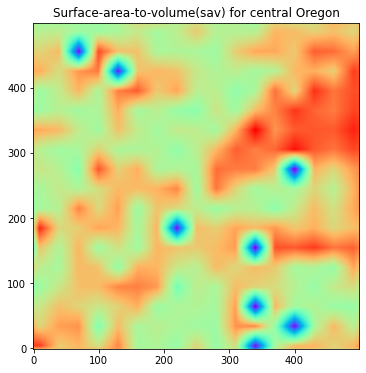

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(raw_sav_data[:,:,0], cmap='rainbow', origin="lower")
ax.set_title('Surface-area-to-volume(sav) for central Oregon')

# Exploring other functions and features

In [16]:
#['bulk_density', 'sav', 'moisture', 'fuel_depth', 'elevation']

Bounding box query found in single source: or_set/or_72.fio


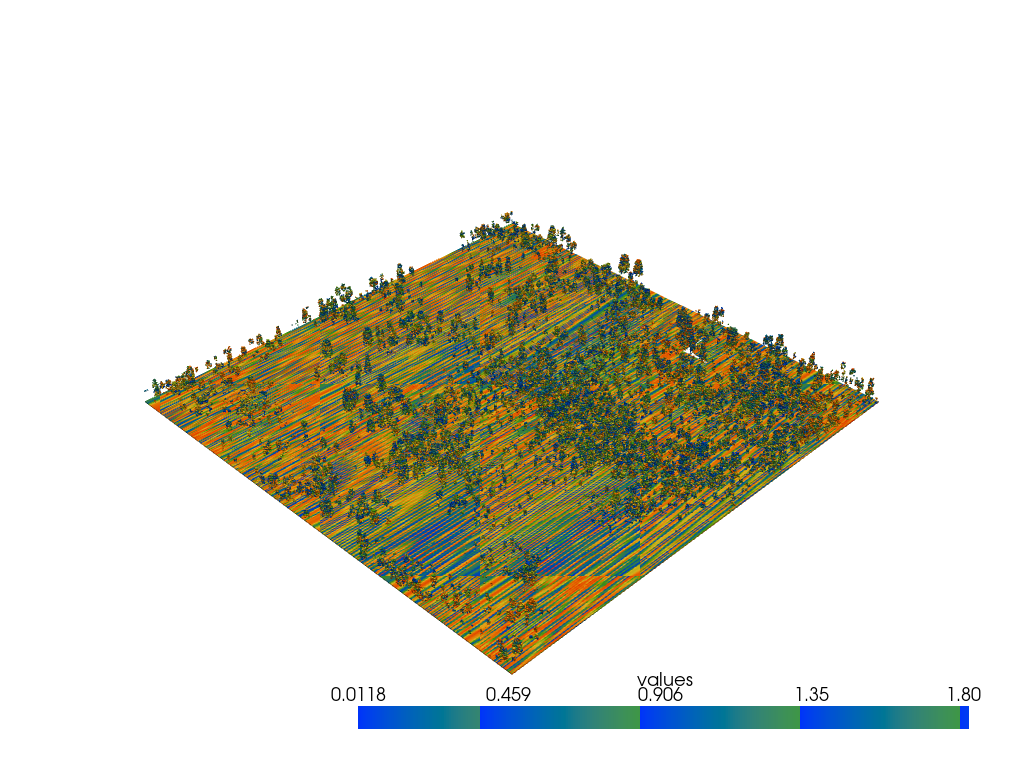

In [17]:
roi = fio.query(lon, lat, 250)
# sav = surface-area-to-volume
roi.view('bulk_density')

Bounding box query found in single source: or_set/or_72.fio


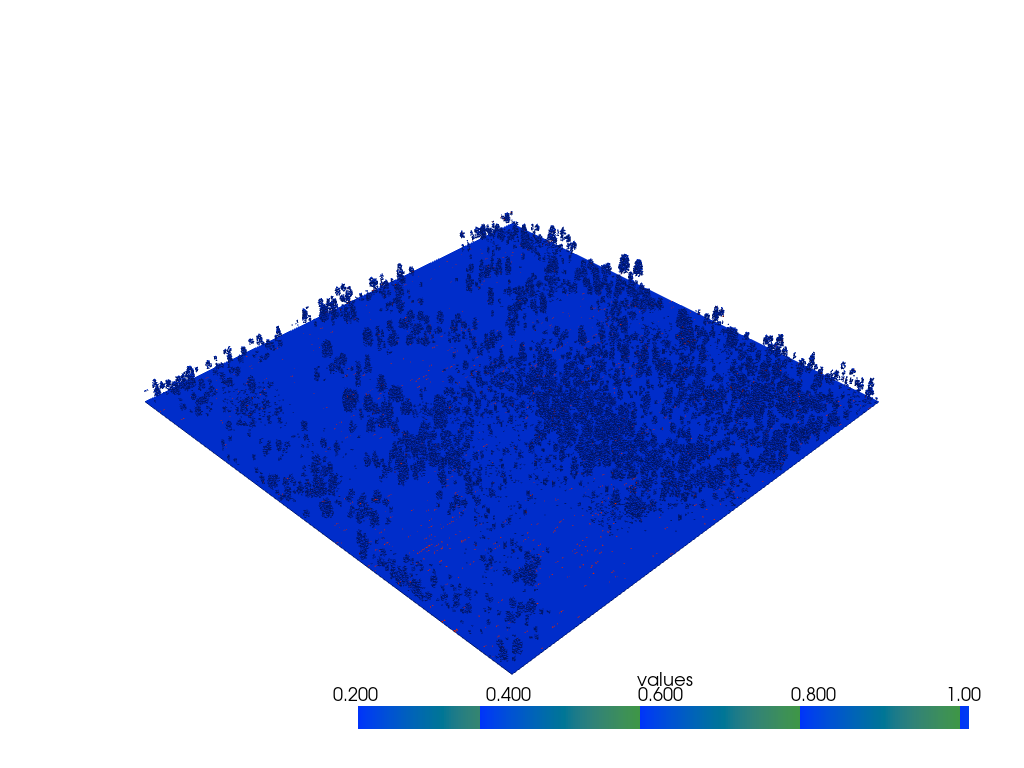

In [18]:
roi = fio.query(lon, lat, 250)
# sav = surface-area-to-volume
roi.view('moisture')

Bounding box query found in single source: or_set/or_72.fio


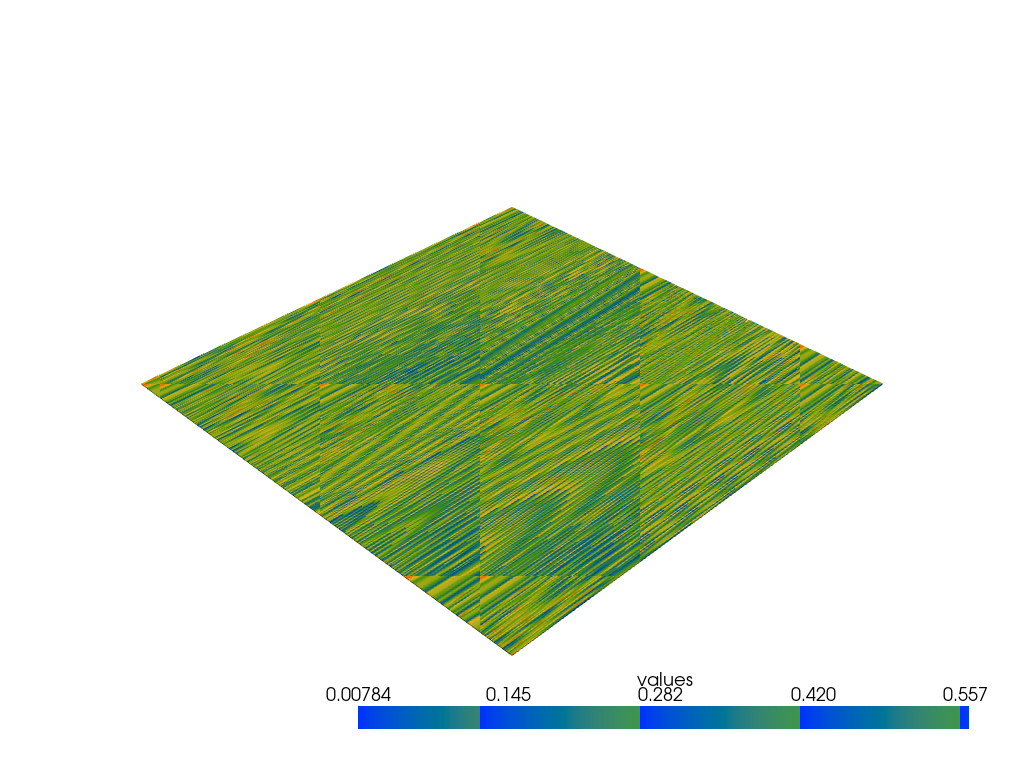

In [19]:
roi = fio.query(lon, lat, 250)
# sav = surface-area-to-volume
roi.view('fuel_depth')